In [9]:
# Importação de bibliotecas
import pandas as pd
from pycaret.classification import *  # inicializa o ambiente PyCaret para classificação

In [10]:
# Carrega os dados em um DataFrame pandas:
data = pd.read_csv('../doc/mushrooms.csv', sep=',')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
# Configuração do ambiente PyCaret:
s = setup(
    data=data,
    target='class',                      # define a coluna alvo (variável resposta)
    session_id=1,                        # define uma semente fixa
    feature_selection=True,              # ativa a seleção automática de variáveis
    feature_selection_method='classic',  # utiliza o método padrão de seleção
    remove_multicollinearity=True,       # remove variáveis altamente correlacionadas
    multicollinearity_threshold=0.9,     # corte de correlação (0.9 é o padrão)
    low_variance_threshold=0.05          # remove features de baixa variância (colunas com valores constantes)
)

# Os parâmetros "normalize" e "remove_outliers" não são úteis para o dataset atual, pois ele não possui variáveis numéricas.
# O parâmetro "fix_imbalance" também não é necessário aqui porque a variável resposta ("class") está bem balanceada.

,Description,Value
0,Session id,1
1,Target,class
2,Target type,Binary
3,Target mapping,"e: 0, p: 1"
4,Original data shape,"(8124, 23)"
5,Transformed data shape,"(8124, 5)"
6,Transformed train set shape,"(5686, 5)"
7,Transformed test set shape,"(2438, 5)"
8,Categorical features,22
9,Preprocess,True


In [12]:
# Compara todos os modelos disponíveis, ordenando pela métrica AUC como prioridade
# Isso treina e avalia todos os modelos selecionados, retornando uma tabela comparativa com métricas
best_auc = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8679,0.9271,0.8679,0.8740,0.8671,0.7355,0.7415,0.1890
et,Extra Trees Classifier,0.8679,0.9271,0.8679,0.8740,0.8671,0.7355,0.7415,0.2200
catboost,CatBoost Classifier,0.8679,0.9271,0.8679,0.8740,0.8671,0.7355,0.7415,0.4950
rf,Random Forest Classifier,0.8679,0.9270,0.8679,0.8740,0.8671,0.7355,0.7415,0.2250
xgboost,Extreme Gradient Boosting,0.8679,0.9270,0.8679,0.8740,0.8671,0.7355,0.7415,0.1830
lightgbm,Light Gradient Boosting Machine,0.8674,0.9265,0.8674,0.8735,0.8666,0.7344,0.7404,0.2630
gbc,Gradient Boosting Classifier,0.8679,0.9262,0.8679,0.8740,0.8671,0.7355,0.7415,0.2220
knn,K Neighbors Classifier,0.8496,0.9138,0.8496,0.8592,0.8473,0.6976,0.7075,0.1980
qda,Quadratic Discriminant Analysis,0.8598,0.9131,0.8598,0.8701,0.8587,0.7203,0.7298,0.1850
lr,Logistic Regression,0.8468,0.8940,0.8468,0.8518,0.8462,0.6936,0.6984,0.2670


In [13]:
# Cria um modelo com base no melhor que foi selecionado a partir da comparação
best_model = create_model(best_auc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7996,0.8822,0.7996,0.8019,0.7988,0.5975,0.6005
1,0.9104,0.9494,0.9104,0.9107,0.9103,0.8203,0.8207
2,0.9174,0.9523,0.9174,0.9177,0.9173,0.8344,0.8348
3,0.8858,0.9478,0.8858,0.8866,0.8856,0.7708,0.7719
4,0.8770,0.9416,0.8770,0.8793,0.8766,0.7528,0.7556
5,0.9033,0.9444,0.9033,0.9043,0.9034,0.8067,0.8076
6,0.8046,0.8887,0.8046,0.8410,0.8006,0.6130,0.6464
7,0.8169,0.9257,0.8169,0.8193,0.8169,0.6343,0.6363
8,0.9102,0.9390,0.9102,0.9132,0.9099,0.8196,0.8229


In [ ]:
# Avalia o modelo original selecionado a partir da comparação
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

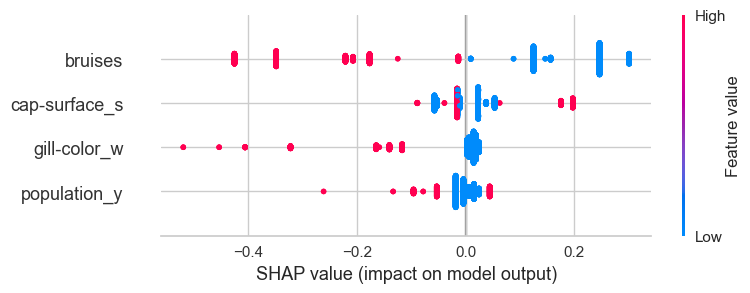

In [15]:
# Interpretando o modelo
interpret_model(best_model)